Link to Section 3: https://datahub.berkeley.edu/user/kc1558628/notebooks/Problem%20Set%201%20(KC%20Harris)/Problem%20Set%201%20Section%203%20(KC%20Harris).ipynb#

Link to Section 4,5: https://datahub.berkeley.edu/user/kc1558628/notebooks/Problem%20Set%201%20(KC%20Harris)/Problem%20Set%201%20Section%204%2C%205%20(KC%20Harris).ipynb#

In [20]:
# import libraries
# !pip install folium --upgrade

from numpy.random import *
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import os
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )


# Incident Report Data
sfpd_ir_2018_2022 = os.path.join('Sample_10k_Police_Department_Incident_Reports__2018_to_Present.csv')
ir = pd.read_csv(sfpd_ir_2018_2022)
ir_2019 = ir[ir['Incident Year'] == 2019]

calls_serv_18_22 = os.path.join('Law_Enforcement_Dispatched_Calls_for_Service__Real-Time.csv')
calls = pd.read_csv(calls_serv_18_22)

# 6) Discussion Questions

6.1) Based on the evidence from this lab assignment, why do you think “hotspots” policing became more popular in the last few decades? What are the pros and cons to this kind of approach?

To the point about the last few decades - "hotspot policing" has it's foundations in theories that emerged (or returned) in the 1980s as relevant to crime control, all following the publishing of Crime Prevention Through Environmental Design (CPTED) in the early 1970s. The first official study happened in Minneapolis began in in 1988 and showed that there was a modest deterrent effect (Sherman and Weisburd 1995). Within the next 10-20 years, a majority of police departments in the US were conducting some kind of mapping and area-based approach to patrols and policing. 

In the context of this assignment and it's review of neighborhood/police district and time of day/week/year/etc correlations, I would argue that hotspot policing definitely presents itself as an appealing alternative to indiscriminate or randomized patrols. There are clearly (this being a weighted term) areas where crime concentrates, particularly within or along neighborhood lines that are already likely well defined within officer's pre-existing beats. And if we can decently argue that this is a moderate deterrent, even better! There's not only a more effective allocation of resources, but slight crime reduction. 

However, other research has shown that these effects are mixed. In a recent NBER research paper (Chalfin et al 2020) data from 250 cities between 1981-2018 shows that while hotspot policing can be a deterrent, it has also had reduced effects in cities with predominantly black populations, and increased arrest rates for petty crimes (which black populations are disproportionately arrested for). The slight (and still in question) deterrence of crime should not come at the cost of even more increased discriminatory practice and criminalization, and this creates a major flaw in CPTED's application. 







As a side note, some of the aforementioned theories that contributed to CPTED's prevelance are listed below: 
* Routine Activity theory
* Situational Crime Prevention Theory 
* Broken Windows Theory
* Crime Opportunity Theory 
* Social Disorganization Theory 
* Crime Pattern Theory 


Sherman, L. W., & Weisburd, D. (1995). General detterent effects of police patrol in crime hot spots: randomized, controlled trial. Justice Quarterly 12(4), 625-648. https://static1.squarespace.com/static/5d809efd96f5c906aaf61f3d/t/601c032236cf8d4a7ccd459f/1612448549602/General+deterrent+effects+of+police+patrol+in+crime+HOT+SPOTS+A+randomized%2C+controlled+trial.pdf

Chalfin, A., Hansen, B., Weisburst, E. K., Williams, M. C., &amp; Jr. (2020, December 14). Police force size and civilian race. NBER. Retrieved March 2, 2022, from https://www.nber.org/papers/w28202?utm_source=npr_newsletter&amp;utm_medium=email&amp;utm_content=20210419&amp;utm_term=5326149&amp;utm_campaign=money&amp;utm_id=49355949&amp;orgid=&amp;utm_att1=money 

6.2) Comment on what sorts of incidents get reported in this database.

For instance, do you see a lot of reports about things like white collar crime? How do you think incident categories are selected? As data scientists, what kinds of ethical and legal concerns should we be aware of when we construct these sorts of datasets?

In [6]:
ir['Incident Code'].unique()

array([ 6244, 64085,  6372, 16623,  6362, 68060, 65015,  6371,  7041,
        4134, 71000, 65010, 64070, 15200, 19057, 64015,  3014,  6314,
        6242,  6224, 27195, 71012, 74000, 28160,  5073, 64020,  4104,
        7023, 27170, 71013, 16625,  9031, 28150, 51040, 19020, 16120,
        6374, 26170,  7044,  7045, 27400,  5072,  6361,  9027,  5051,
        7021,  5041,  3474, 15161,  5043,  6301, 68020, 72000,  6151,
       28100,  9320,  6241, 27175, 16652, 63010, 12030,  4012, 15162,
       28135,  4011,  3044,  5071, 62030, 27065, 28140,  6394,  6302,
       15300,  9024, 26031, 75000, 75030, 12080, 62050, 27130,  6243,
       15151, 65016, 10050,  5081, 19024,  4154,  7025, 26030,  6364,
        7046, 16710, 28161,  7020, 11012, 10115, 27090,  5015, 61030,
       26080,  6363, 68069,  4014,  4170, 15150,  5083, 75025,  6113,
        7100, 16650,  5011,  6234, 30200,  5014,  3084, 26120,  6303,
       68050, 28165,  4073,  7200, 65050,  7052, 27100,  6373, 15201,
       16660, 16110,

,Count,Proportion of Crime
Social Category,,
Blue Collar Crime,7004,0.701031
misc,2669,0.267140
White Collar Crime,318,0.031829


<AxesSubplot:xlabel='Social Category'>

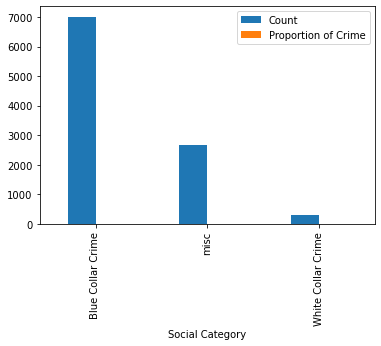

In [12]:
ir_crime_simple = ir[['Incident ID', 'Incident Category', 'Incident Subcategory', 'Resolution']].copy()

ir_crime_simple['Social Category'] = (ir_crime_simple['Incident Category'])

def crime_classifier(df, col):
    df[col].replace({'Larceny Theft': 'Blue Collar Crime',
                    'Arson': 'Blue Collar Crime',
                    'Assault': 'Blue Collar Crime',
                    'Burglary': 'Blue Collar Crime',
                    'Case Closure': 'misc',
                    'Civil Sidewalks': 'misc',
                    'Commercial Sex Acts': 'Blue Collar Crime',
                    'Courtesy Report': 'Blue Collar Crime',
                    'Disorderly Conduct': 'Blue Collar Crime',
                    'Drug Offense': 'Blue Collar Crime',
                    'Drug Violation': 'Blue Collar Crime',
                    'Embezzlement': 'White Collar Crime',
                    'Fire Report': 'misc',
                    'Forgery And Counterfeiting': 'White Collar Crime',
                    'Fraud': 'White Collar Crime',
                    'Homicide': 'Blue Collar Crime',
                    'Human Trafficking (A), Commercial Sex Acts': 'White Collar Crime',
                    'Human Trafficking, Commercial Sex Acts': 'White Collar Crime',
                    'Lost Property': 'misc',
                    'Malicious Mischief': 'Blue Collar Crime',
                    'Miscellaneous Investigation': 'misc',
                    'Missing Person': 'misc',
                    'Motor Vehicle Theft': 'Blue Collar Crime',
                    'nan': 'misc',
                    'Non-Criminal': 'misc',
                    'Offences Against The Family And Children': 'Blue Collar Crime',
                    'Other Miscellaneous': 'misc',
                    'Other Offenses': 'misc',
                    'Other': 'misc',
                    'Prostitution': 'Blue Collar Crime',
                    'Rape': 'Blue Collar Crime',
                    'Recovered Vehicle': 'misc',
                    'Robbery': 'Blue Collar Crime',
                    'Sex Offense': 'Blue Collar Crime',
                    'Stolen Property': 'Blue Collar Crime',
                    'Suicide': 'misc',
                    'Suspicious Occ': 'Blue Collar Crime',
                    'Suspicious': 'Blue Collar Crime',
                    'Traffic Collision': 'misc',
                    'Traffic Violation Arrest': 'misc',
                    'Vandalism': 'Blue Collar Crime',
                    'Vehicle Impounded': 'misc',
                    'Vehicle Misplaced': 'misc',
                    'Warrant': 'Blue Collar Crime',
                    'Weapons Carrying Etc': 'Blue Collar Crime',
                    'Weapons Offense': 'Blue Collar Crime'}, inplace=True)
    

crime_classifier(ir_crime_simple, 'Social Category') 
    

# https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values
ir_crime_simple_blue_collar = ir_crime_simple.loc[ir_crime_simple['Social Category'].isin(['Blue Collar Crime'])]
ir_crime_simple_white_collar = ir_crime_simple.loc[ir_crime_simple['Social Category'].isin(['White Collar Crime'])]
ir_crime_simple_misc = ir_crime_simple.loc[ir_crime_simple['Social Category'].isin(['misc'])]

ir_crime_simple_grouped = ir_crime_simple.groupby(['Incident Category']).size().to_frame(name = 'Count').sort_values("Count", ascending = False).reset_index()
ir_crime_simple_grouped_social = ir_crime_simple.groupby(['Social Category']).size().to_frame(name = 'Count').sort_values("Count", ascending = False)
ir_crime_simple_grouped_social['Proportion of Crime'] = ir_crime_simple_grouped_social['Count']/sum(ir_crime_simple_grouped_social['Count'])


ir_crime_simple_grouped_social
ir_crime_simple_grouped_social.plot.bar()

In [5]:
ir_crime_simple_grouped['Social Category'] = (ir_crime_simple_grouped['Incident Category'])
crime_classifier(ir_crime_simple_grouped, 'Social Category')

ir_crime_simple_grouped.sort_values(['Social Category', 'Count'], ascending=[True, False])

,Incident Category,Count,Social Category
0,Larceny Theft,2936,Blue Collar Crime
2,Malicious Mischief,717,Blue Collar Crime
3,Assault,634,Blue Collar Crime
4,Burglary,605,Blue Collar Crime
6,Motor Vehicle Theft,510,Blue Collar Crime
8,Warrant,319,Blue Collar Crime
11,Drug Offense,248,Blue Collar Crime
13,Suspicious Occ,213,Blue Collar Crime
14,Robbery,196,Blue Collar Crime
15,Disorderly Conduct,166,Blue Collar Crime


When we look at the number of crimes per Incident Category, it's obvious that 'white collar' crimes are substantially less reported on. They only occupy about 3% of the IRs in this dataset - with 'blue collar' crimes at about 70% and the in-between category of 'misc' in a distant second. Even the most common white collar crime, fraud, is still less than half of the most common miscallaneous category and behind the 8th ranking most common ir, warrants, at 319 in the blue collar category. 

This absolutely speaks to how the IR system is designed. The collection/analysis of this data, and it's inherent eventual use in the field, is designed by the SFPD Crime Strategies Unit. Looking at the monthly crime report here (https://www.sanfranciscopolice.org/sites/default/files/2021-02/SFPDCompstat.20210211.pdf) and the city's crime dashboard here (https://www.sanfranciscopolice.org/stay-safe/crime-data/crime-dashboard) reveals that the design is largely centered on two categories: Violent Crime, and Property Crime. Both of these predominantly consist of Incident Categories that count as blue collar, and as a result create a system that is disproportionately focused on blue collar crime. 

But this is a very broad way to think about the flaws of this system: instead we should consider that white collar crimes have a number of differentiating factors that make them difficult to report on/arrest for: 1) that white collar criminals are usually higher income and/or have access to better tools 2) both property crime and violent crime occur in person, while most white collar crimes are more remote or are in person for substantially less time and less often 3) criminal activity that is harder to track/know about will likely get less funding and attention from police departments and 4) criminal activity like this might also be in the realm of other organizations (the FBI for example) and only involve the police when arrests, evidence, or local warrants are involved. 

There are obligations as criminologists, data scientists, lawmakers, and law enforcement officials that come into play when certain crime is weighted in this way. The way we collect and organize data becomes the way the world is understood - and if we do this in a way that is not equitable, the world slowly becomes warped. More specifically, if we do not make a point to represent white collar crime as prominently as blue collar crime where appropriate, we risk contributing to the subtle (and not so subtle) narratives where these crimes simply don't exist. And in particular, to the ones where the blue collar crimes are the only thing we CAN see. This affects existing discriminatory feedback loops in public perception, social funding, and law enforcement practices that will continue to disproportionaly affect low income and minority groups most and distort future data. 


******As a side note, this doesn't even address the fact that the above NBER paper (Chalfin et al 2020) found that hotspot policing increased arrest rates for petty crimes. This also disproportionately impacts people of color. 

6.3) What other sorts of data would help improve your analysis?

I'd be interested in creating a choropleth map showing number of calls per neighborhood, and then overlaying that with our current map from 4.1 of incident reports. Or possibly overlaying the choropleth map of total crimes in each neighborhood from 5.1 with bubbles for each neighborhood who's size correlated to the number of calls they'd had? We could access this data here:
https://data.sfgov.org/Public-Safety/Law-Enforcement-Dispatched-Calls-for-Service-Close/2zdj-bwza

On top of that, I'd also be interested in seeing if we could merge this IR dataset with this closed Dispatched Calls for Service dataset, and create the same charts as above. We could also use the matched datasets to find rates of which incident categories most often got called about. https://data.sfgov.org/Public-Safety/Law-Enforcement-Dispatched-Calls-for-Service-Close/2zdj-bwza

We could also merge this with census data for SF, and look at median income per neighborhood, population density per neighborhood, etc. Although I'm having trouble finding geographically specific information from the census - right now I can only find information for SF as a whole. I'll need to look into this more. 